In [1]:
import tensorflow_hub as hub

In [2]:
detector = hub.load("https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1")

In [4]:
!wget https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8aHVtYW58ZW58MHx8MHx8&w=1000&q=80

--2023-02-01 17:09:16--  https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d?ixlib=rb-4.0.3
Resolving images.unsplash.com (images.unsplash.com)... 199.232.150.208, 2a04:4e42:65::720
Connecting to images.unsplash.com (images.unsplash.com)|199.232.150.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7376061 (7.0M) [image/jpeg]
Saving to: ‘photo-1503023345310-bd7c1de61c7d?ixlib=rb-4.0.3’

photo-1503023345310 100%[===================>]   7.03M  --.-KB/s    in 0.04s   

2023-02-01 17:09:16 (176 MB/s) - ‘photo-1503023345310-bd7c1de61c7d?ixlib=rb-4.0.3’ saved [7376061/7376061]



In [5]:
import matplotlib.pyplot as plt

In [9]:
import cv2

In [280]:
img = cv2.imread("/content/image.jpg")

In [12]:
import numpy as np

In [281]:
img = np.array(img)

In [283]:
img.shape

(1688, 3000, 3)

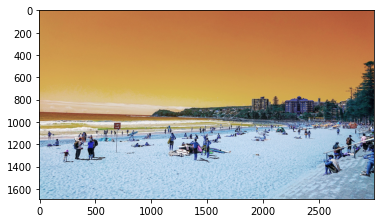

In [282]:
plt.imshow(img)

In [16]:
import tensorflow as tf

In [284]:
img = tf.constant(img)

In [285]:
detector_output = detector(tf.expand_dims(img,axis=0))

In [286]:

class_ids = detector_output["num_detections"]

In [287]:
keypoints = detector_output["detection_keypoints"]

In [288]:
keypoints.shape

TensorShape([1, 100, 17, 2])

In [289]:
imageread = cv2.imread("/content/image.jpg")

In [212]:
imagegray = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)

In [213]:
imagegray = imagegray/255

In [214]:
imagegray


array([[0.68235294, 0.68235294, 0.68627451, ..., 0.61960784, 0.61960784,
        0.61568627],
       [0.68235294, 0.68235294, 0.68627451, ..., 0.61960784, 0.61960784,
        0.61568627],
       [0.68235294, 0.68235294, 0.68627451, ..., 0.61960784, 0.61960784,
        0.61568627],
       ...,
       [0.19215686, 0.19215686, 0.19607843, ..., 0.18431373, 0.18431373,
        0.18431373],
       [0.19215686, 0.19215686, 0.19607843, ..., 0.18431373, 0.18431373,
        0.18431373],
       [0.19215686, 0.19215686, 0.19607843, ..., 0.18039216, 0.18039216,
        0.18039216]])

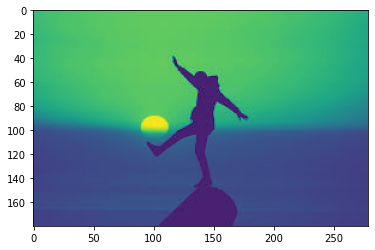

In [215]:
plt.imshow(imagegray,vmin=0,vmax=1)

In [291]:
x_=[]
y_=[]
for x,y in enumerate(keypoints):
  for a,b in enumerate(y):
    for c,d in enumerate(b):
      x_.append(float(d[1])*3000)
      y_.append(float(d[0])*1688)
      

In [257]:
ks = detector_output["detection_keypoint_scores"]

In [264]:
max_score_list = []
for e,f in enumerate(ks):
  for g,h in enumerate(f):
    max_score_list.append(float(max(h)))

In [269]:
len(max_score_list),len(x_)

(100, 1700)

In [292]:
image=cv2.imread("/content/image.jpg")

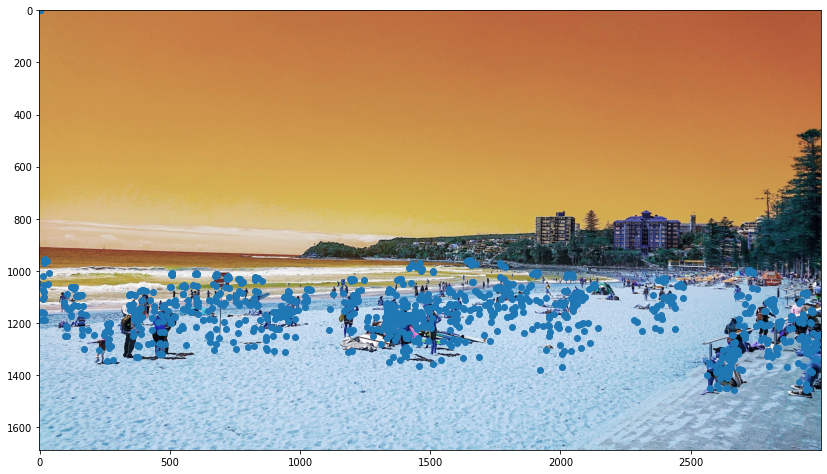

In [293]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(image,vmin=0,vmax=1)
ax.scatter(x_,y_,vmin=0,vmax=1)